# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [37]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# command let the output of plotting commands is displayed inline within frontends like the Jupyter notebook
%matplotlib inline

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

### Loading Data

In [38]:
#  Code to read the train data
df = pd.read_csv("Train.csv")
#  Code to read the test data
df_test = pd.read_csv("Test.csv")

<IPython.core.display.Javascript object>

### Understanding the shape of the dataset.

In [39]:
# Checking the number of rows and columns in the training data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the training dataset")

There are 40000 rows and 41 columns in the training dataset


<IPython.core.display.Javascript object>

In [40]:
# Checking the number of rows and columns in the test data
print(
    f"There are {df_test.shape[0]} rows and {df_test.shape[1]} columns in the testing dataset"
)

There are 10000 rows and 41 columns in the testing dataset


<IPython.core.display.Javascript object>

### Lets copy train and test dataset so that we can easily recover unchanged data

In [41]:
# let's create a copy of the training data
data = df.copy()

<IPython.core.display.Javascript object>

In [42]:
# let's create a copy of the testing data
data_test = df_test.copy()

<IPython.core.display.Javascript object>

### Viewing the first, last and random 5 rows of the dataset for better understanding of dataset

In [43]:
# let's view the first 5 rows of the training data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


<IPython.core.display.Javascript object>

In [44]:
# let's view the last 5 rows of the  training data
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


<IPython.core.display.Javascript object>

### Checking the duplicate data. And if any, then lets remove it.

In [45]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

**Observation:**
* There is no duplicates value in the dataset.

### Checking the missing values in the train and test dataset

In [46]:
# let's check for missing values in the training dataset
round(data.isnull().sum() / data.isnull().count() * 100, 2)

V1       0.120
V2       0.100
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

<IPython.core.display.Javascript object>

**Observation:**
* In the training dataset, `V1 and V2`  have `0.12% and 0.10%` missing values.

In [47]:
# let's check for missing values in the testing data
round(data_test.isnull().sum() / data_test.isnull().count() * 100, 2)

V1       0.110
V2       0.070
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

<IPython.core.display.Javascript object>

**Observation:**
* In the testing dataset, `V1 and V2`  have `0.11% and 0.07%` missing values.

### Checking the data types of the columns for the dataset

In [48]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

**Observations:**
* V1 and V2 have missing values.
* There are 40000 rows and 41 columns in the dataset.
* Out of 41 columns, 40 columns are float type and one column is int type.

## Exploratory Data Analysis (EDA)

* EDA is an important part of any project involving data.
* EDA is a thorough examination meant to uncover the underlying structure of a data set.
* EDA exposes trends, patterns, and relationships that are not readily apparent.
* It is important to investigate and understand the data better before building a model with it.

### Let's check the statistical summary of the data.

In [49]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


<IPython.core.display.Javascript object>

**Observations:**
* Almost all the columns except Target have outliers.
* Columns - `V1 to V40` might have outliers on the right end as there is a large difference between 75th percentile and maximum values.

### Plotting histograms and boxplots for all the variables

In [50]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="crest"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


<IPython.core.display.Javascript object>

### Plotting all the features at one go

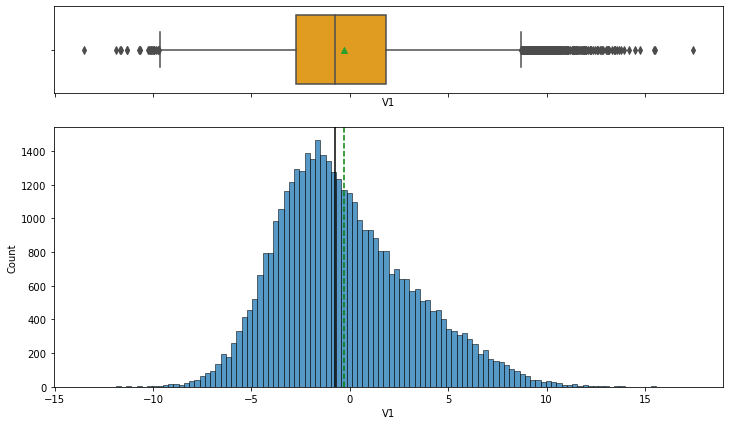

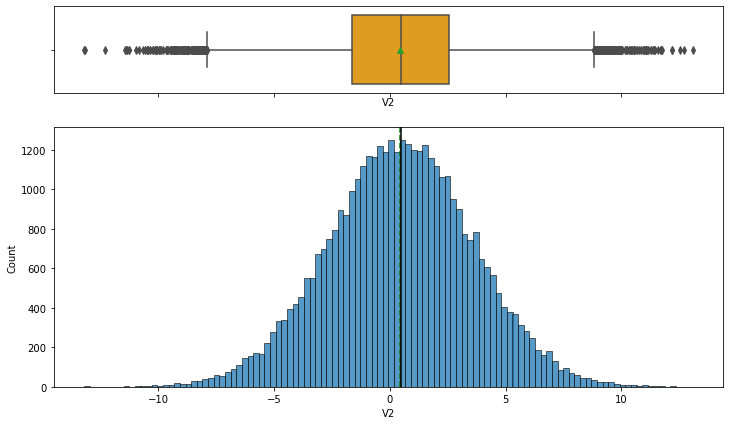

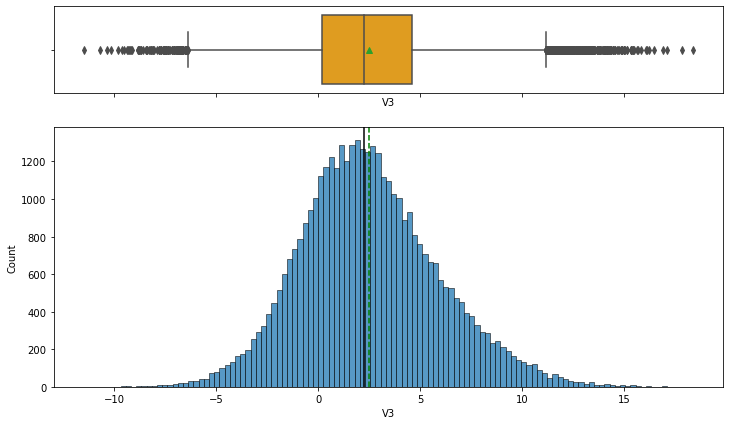

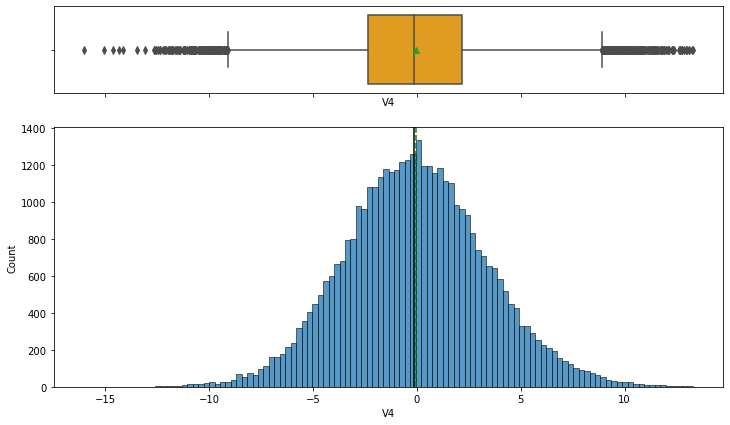

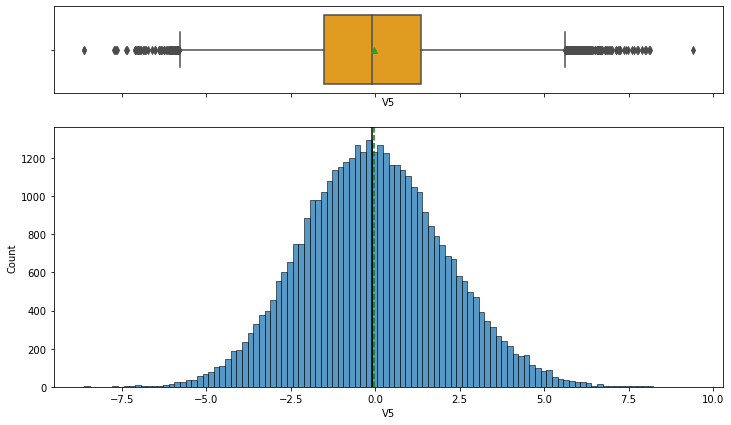

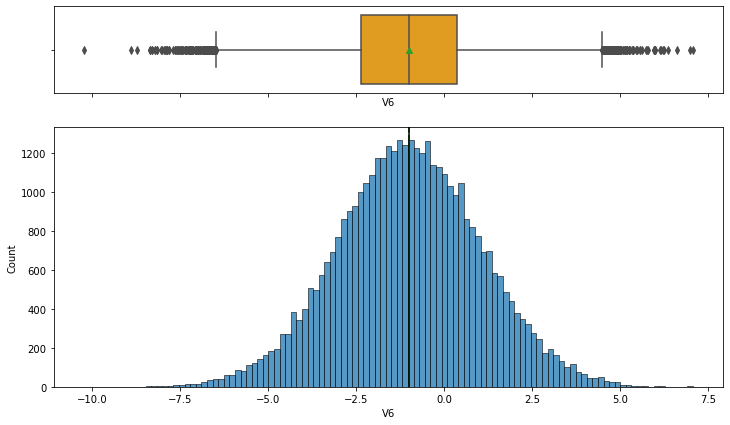

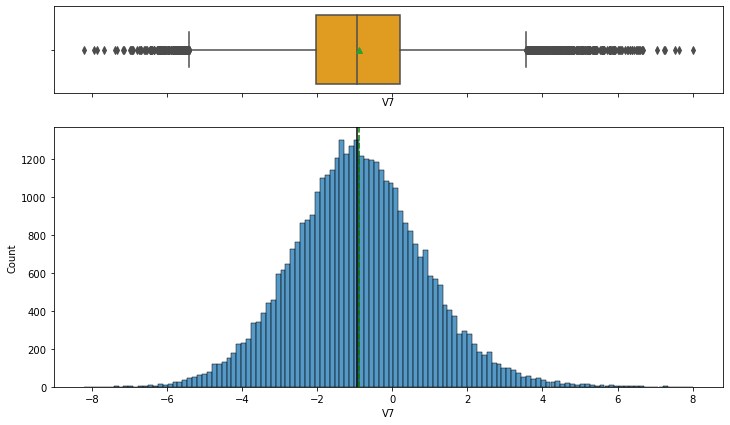

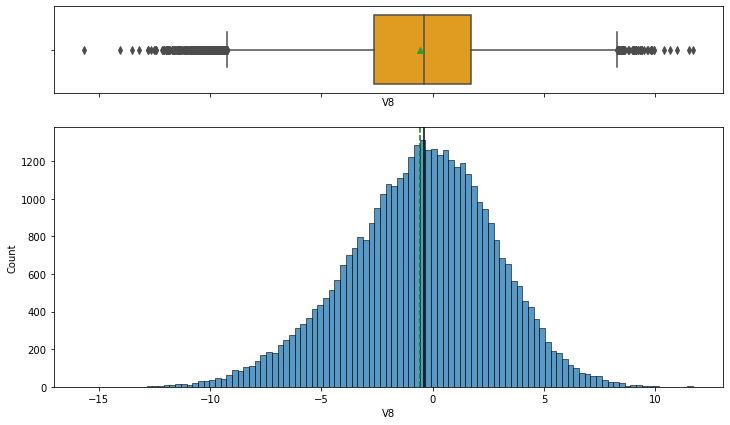

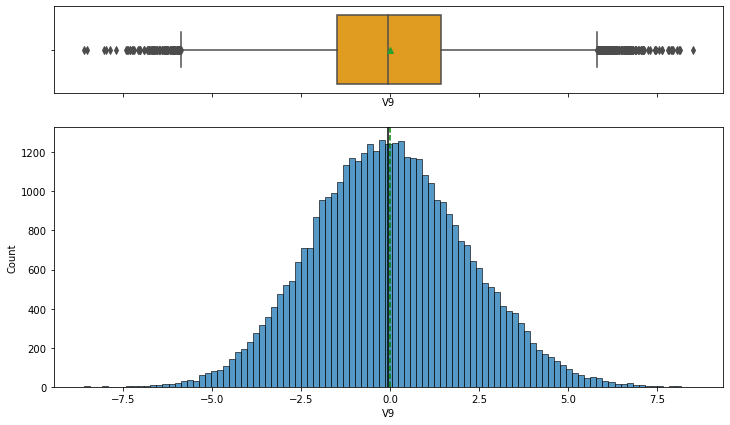

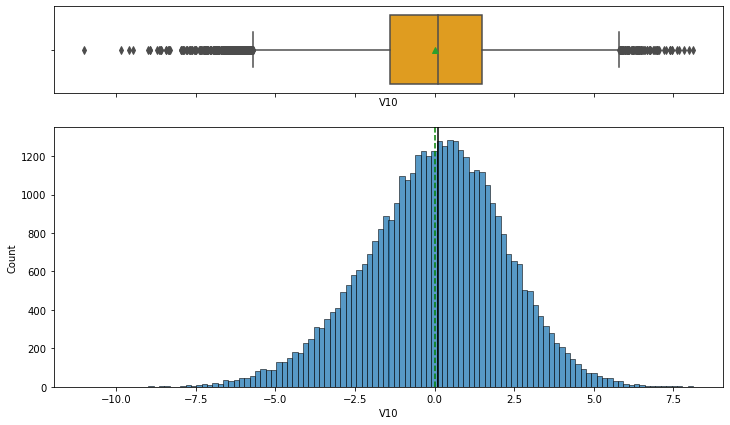

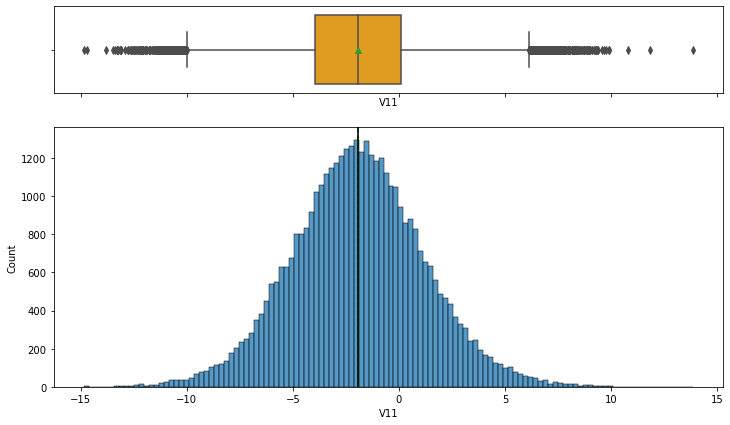

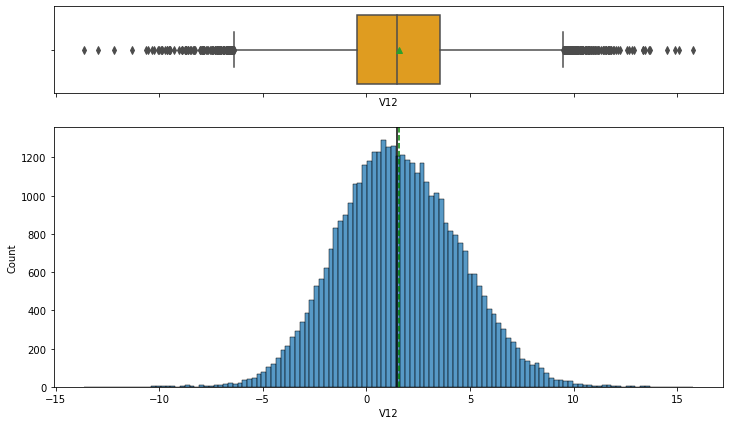

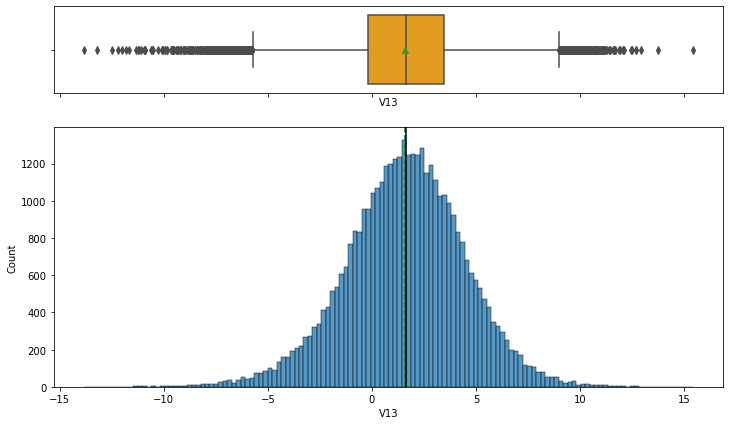

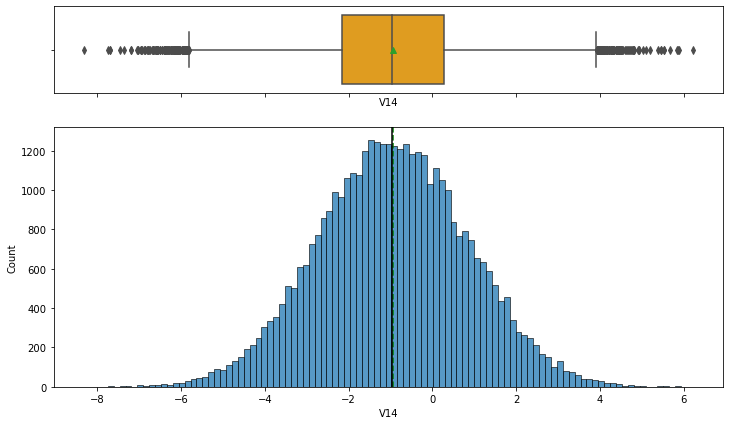

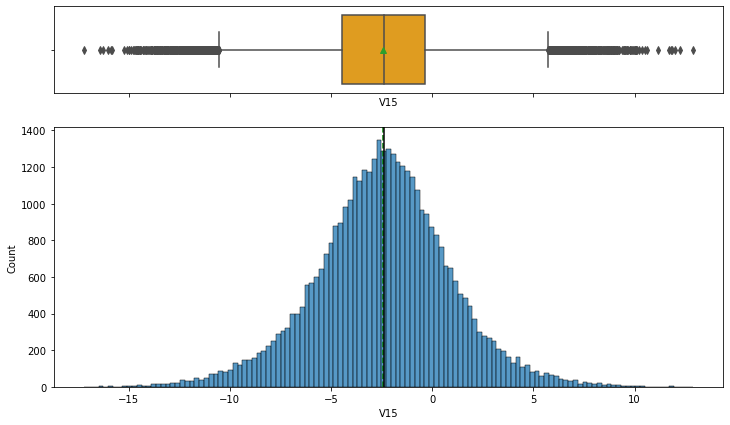

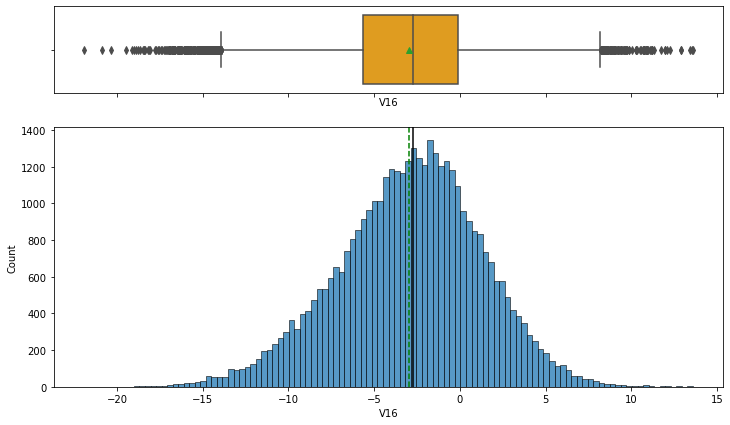

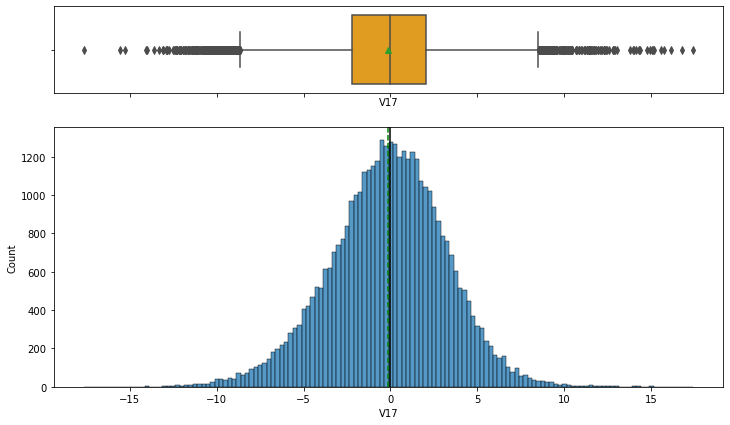

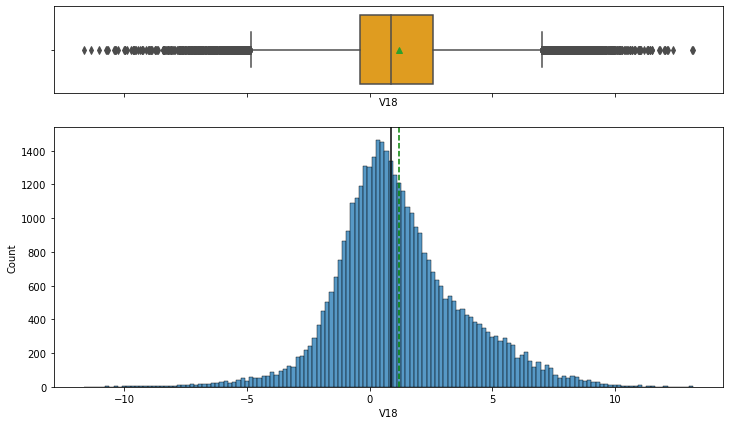

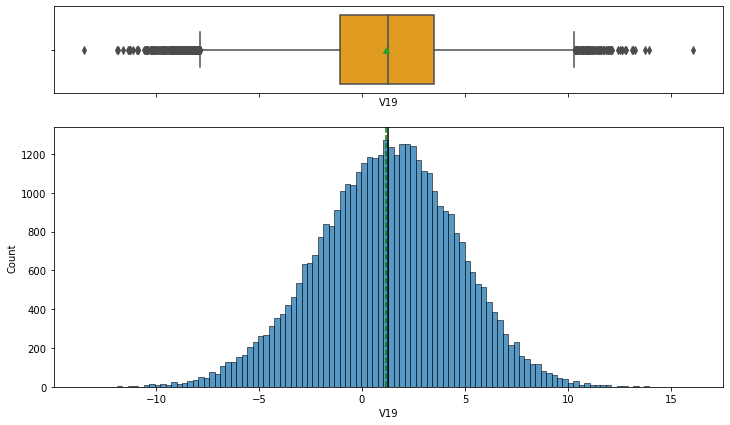

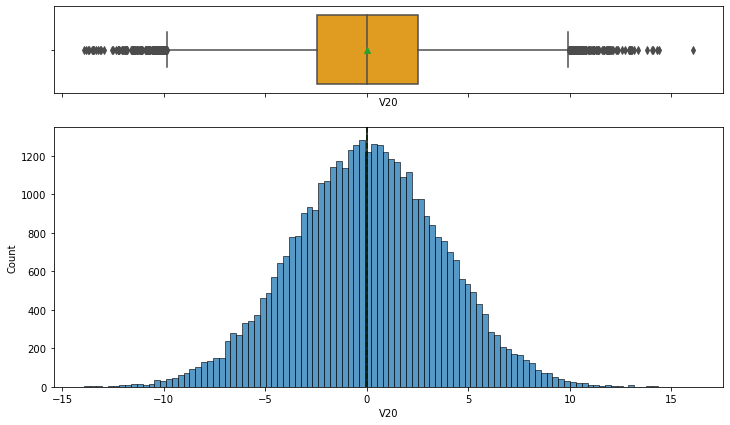

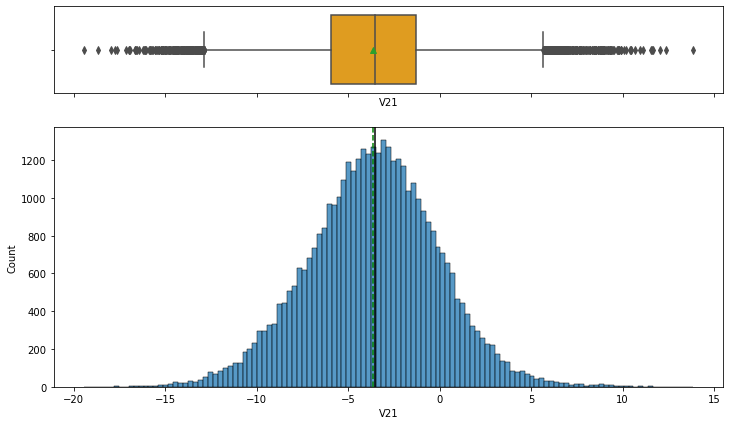

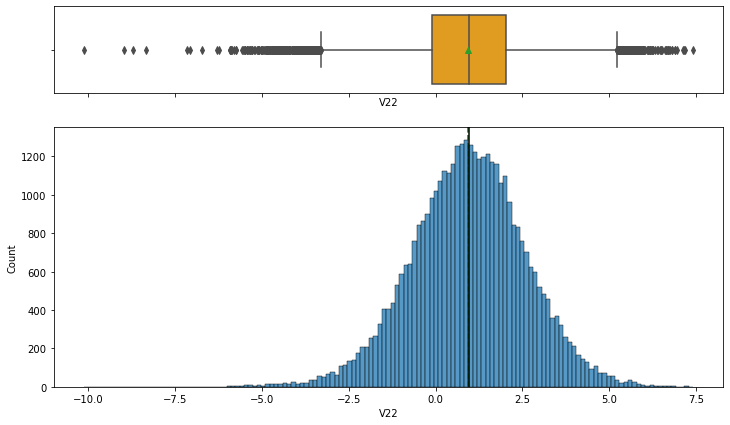

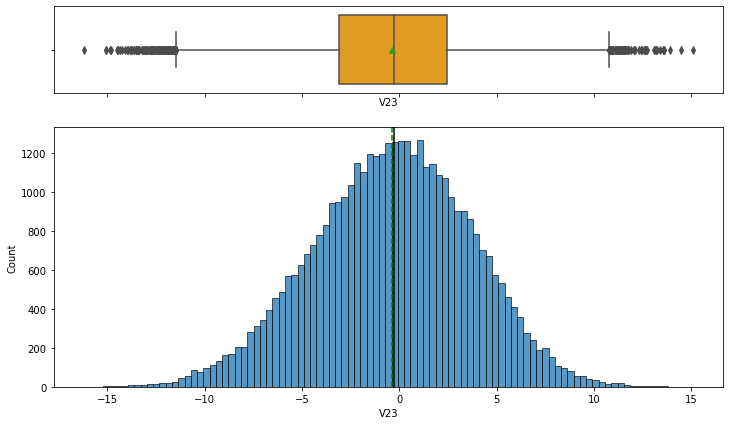

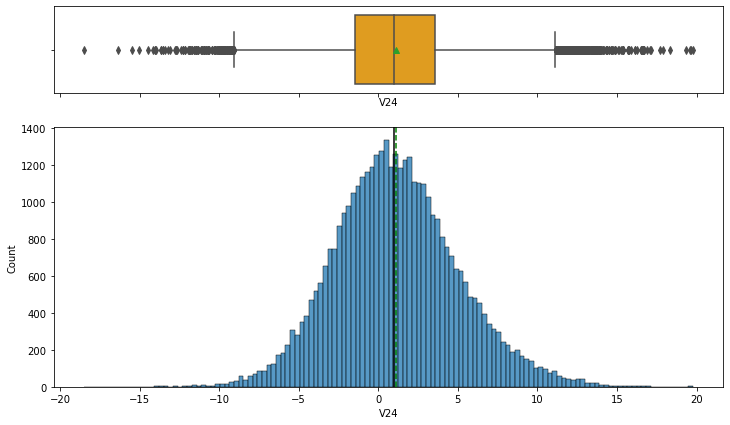

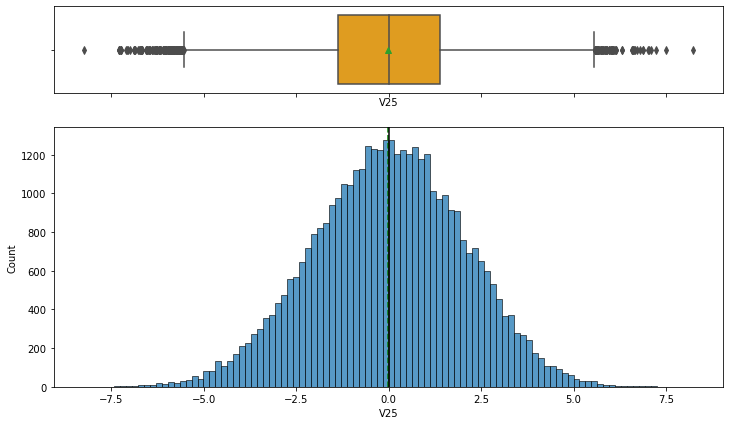

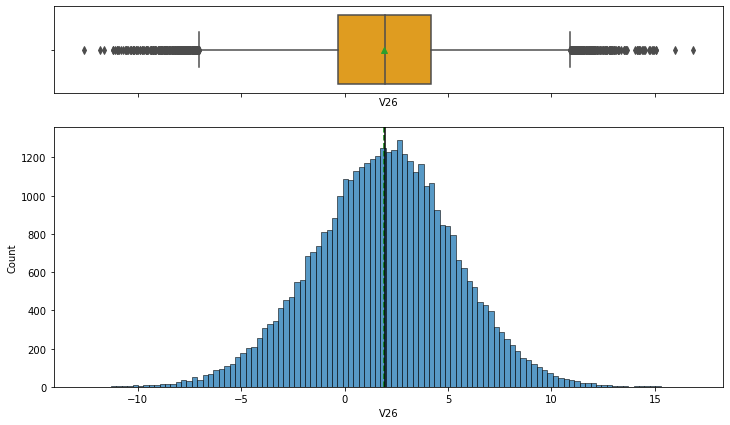

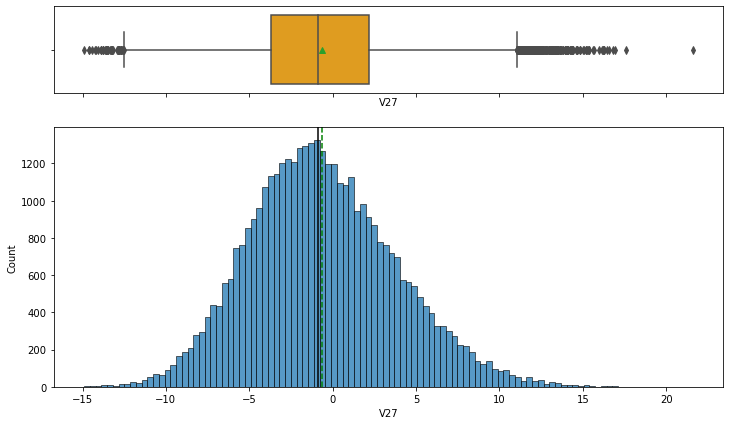

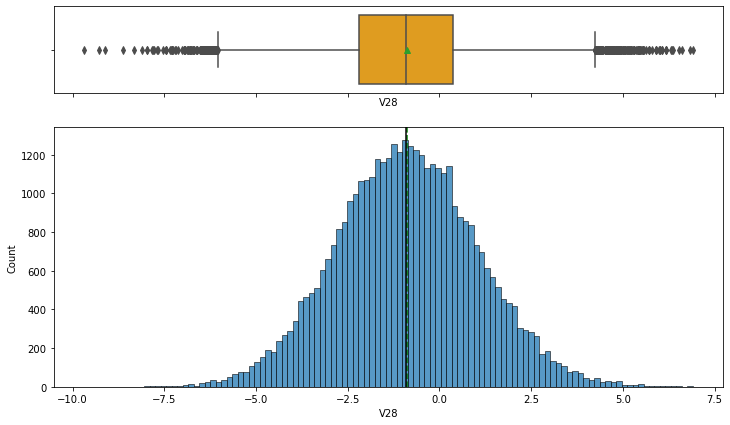

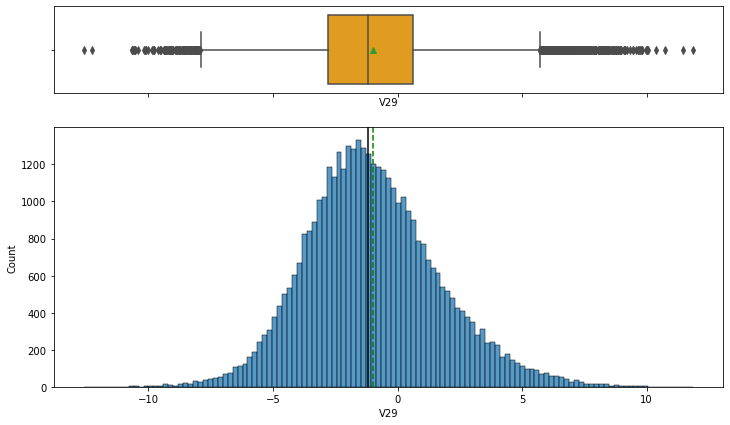

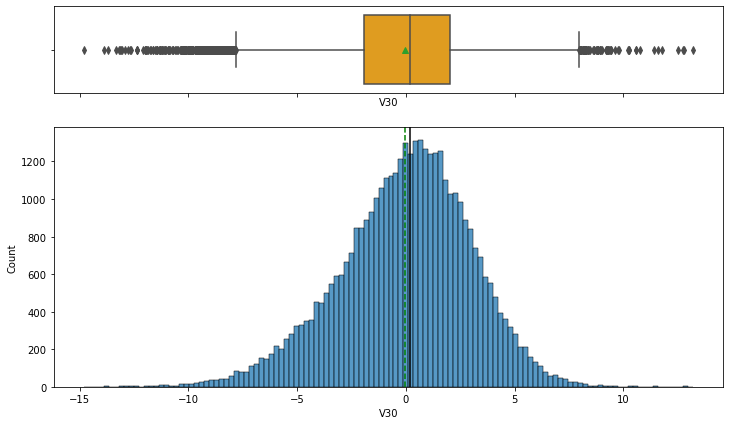

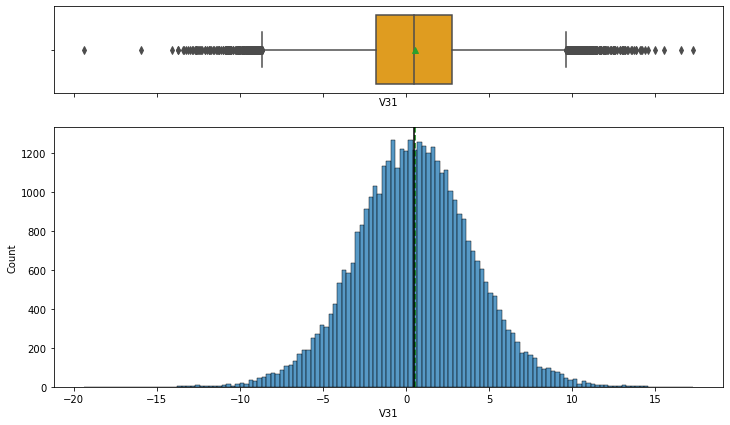

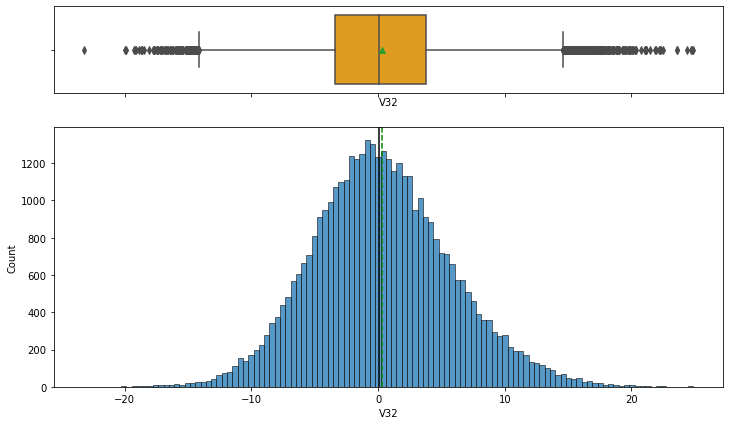

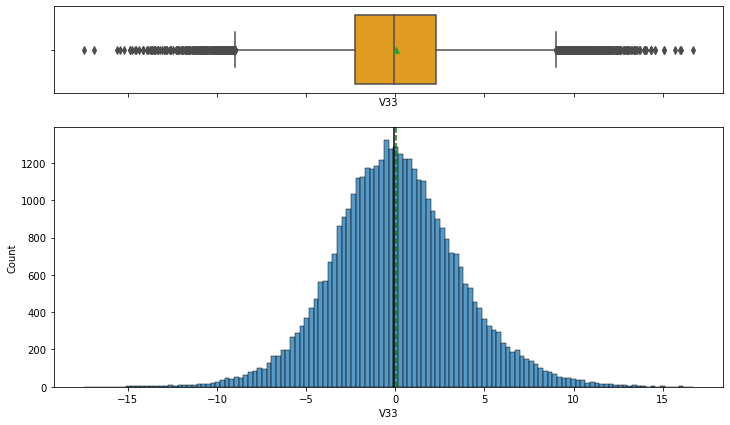

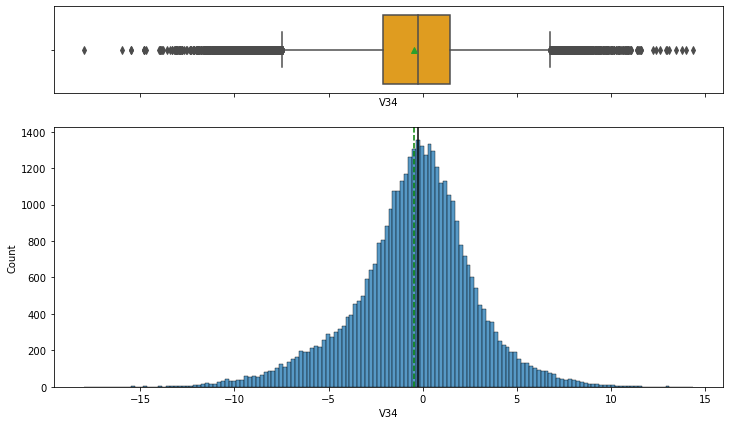

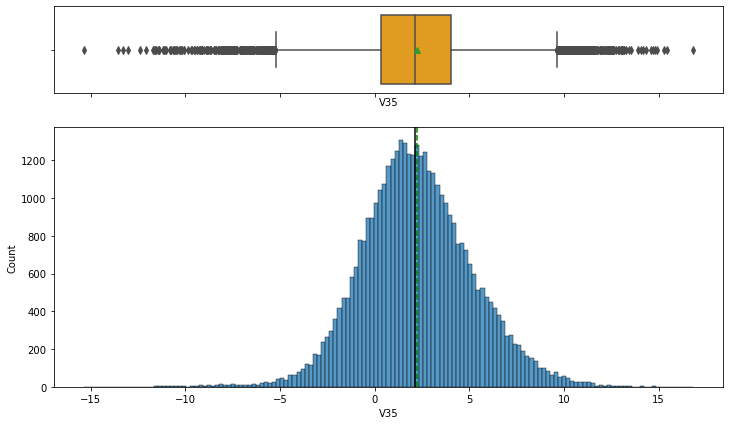

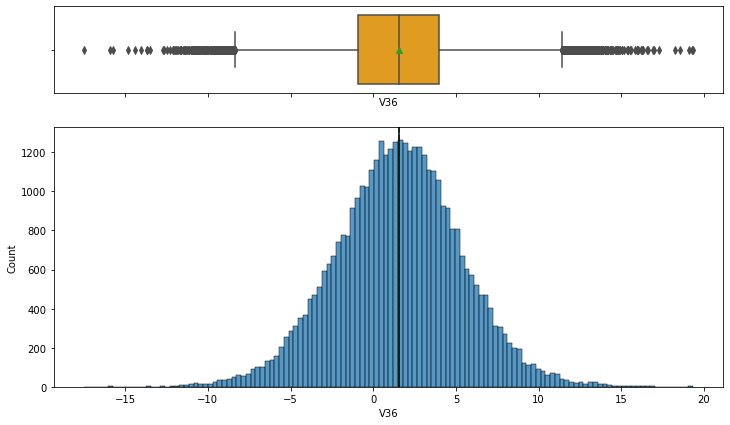

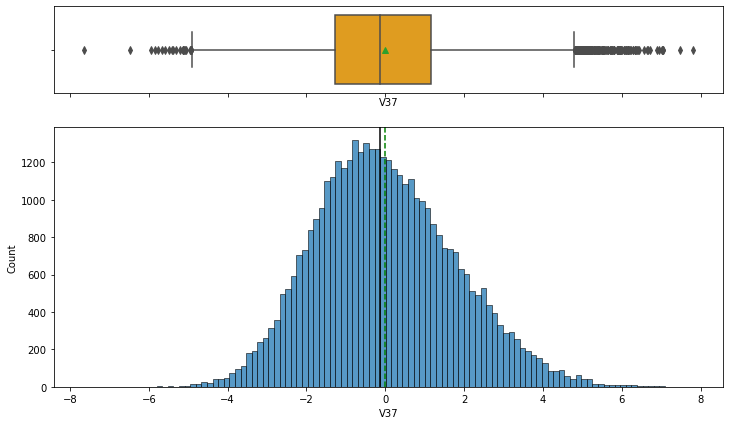

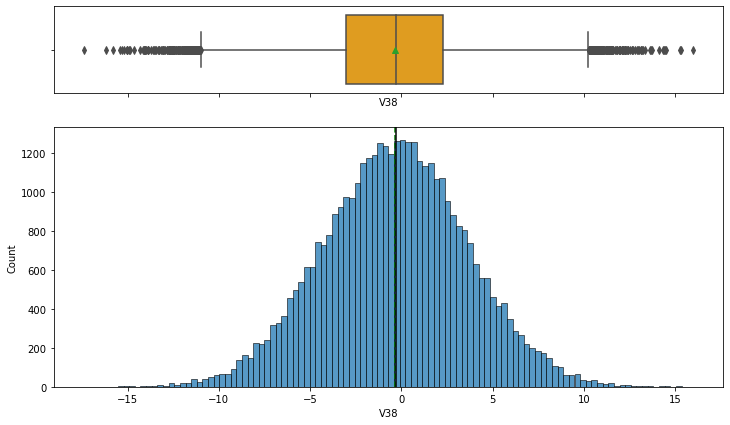

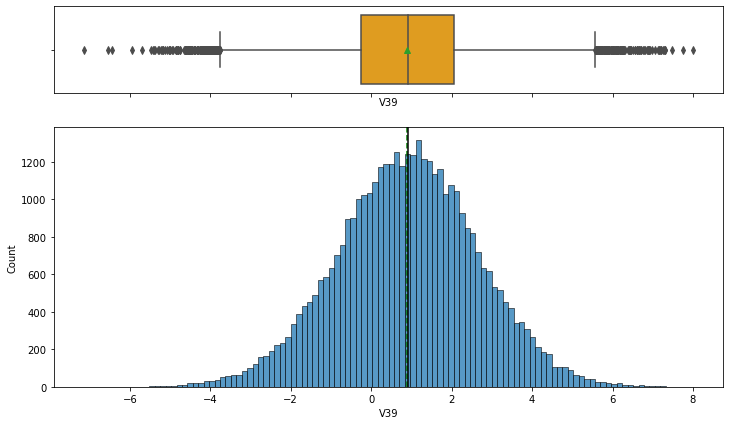

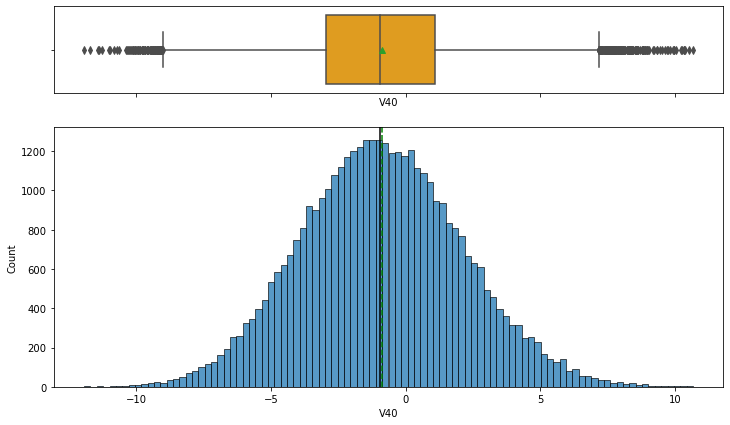

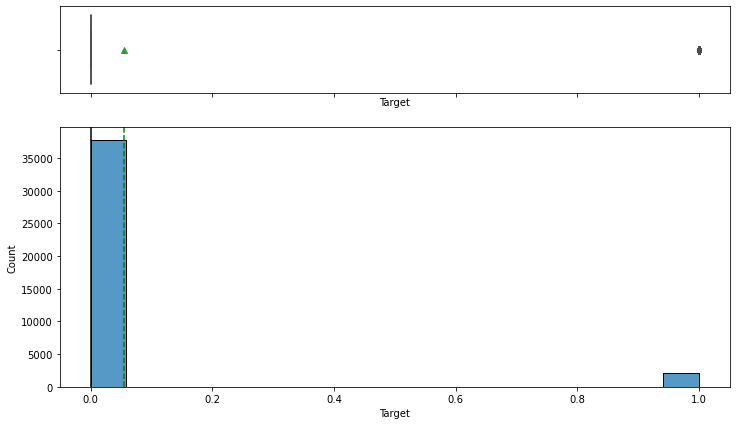

<IPython.core.display.Javascript object>

In [51]:
# for loop plot user defined histogram boxplot for all the features
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

**Observations:**
* Data is normally distributed in all the features from `V1 to V40`.
* As we see, there are lot of outliers in the all features of the dataset.
* However, we will not treat outliers since these sensor data are encrypted and we actually do not know about the data characteristics or meaning. 

### Let's look at the values in target variable

In [52]:
##  Checking the class distribution in target variable for train data
data["Target"].value_counts()

0    37813
1     2187
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

In [53]:
##  Checking the class distribution in target variable for test data
data["Target"].value_counts()

0    37813
1     2187
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

**Observation:**
* Values in the target variable is imbalanced both in train and test dataset.

## Data Pre-processing

- Missing value treatment (if needed)
- Feature engineering(if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [54]:
# Dividing data into independent variables(X) and target variable(y) in training data
X = data.drop(["Target"], axis=1)
y = data["Target"]

# Dividing data into independent variables(X) and target variable(y) in testing data
X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

<IPython.core.display.Javascript object>

In [55]:
# Splitting data into training and validation set in the ratio of 75:25

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [56]:
print(X_train.shape, X_val.shape, X_test.shape)

(30000, 40) (10000, 40) (10000, 40)


<IPython.core.display.Javascript object>

### Missing-Value Treatment

* We will use median to impute missing values in Target column.

In [57]:
# creating imputer to treat missing values with median
imputer = SimpleImputer(strategy="median")

# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

<IPython.core.display.Javascript object>

In [58]:
# Checking that no column has missing values in train data sets
print("Missing values in train dataset:\n")
print(X_train.isna().sum())
print("-" * 30)

Missing values in train dataset:

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------


<IPython.core.display.Javascript object>

In [59]:
# Checking that no column has missing values in validation sets
print("Missing values in validation dataset:\n")
print(X_val.isna().sum())
print("-" * 30)

Missing values in validation dataset:

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------


<IPython.core.display.Javascript object>

In [60]:
# Checking that no column has missing values in test sets
print("Missing values in test dataset:\n")
print(X_test.isna().sum())

Missing values in test dataset:

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


<IPython.core.display.Javascript object>

**Observation:**
* All missing values in the `V1 and V2 column` have been treated for `train, validation and test` dataset.

## Model Building

### Model evaluation criterion
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are the failures correctly predicted by the model.
- True Negatives (TN) are not the failures correctly prediccted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by the model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric is to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [61]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [62]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we will use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [63]:
# defining scorer with recall_score to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

**Let's start by building different models using KFold and cross_val_score and tune the best model using RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

### Model Building with original data

In [64]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

# Defining Empty list to store all model's CV scores
results1 = []

# Defining Empty list to store name of the models
names = []


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance:

dtree: 0.7335365853658538
Logistic regression: 0.48292682926829267
Bagging: 0.7347560975609755
Random forest: 0.7621951219512195
GBM: 0.7170731707317073
Adaboost: 0.6164634146341463
Xgboost: 0.8158536585365853

Validation Performance:

dtree: 0.7477148080438757
Logistic regression: 0.4625228519195612
Bagging: 0.7349177330895795
Random forest: 0.7659963436928702
GBM: 0.7148080438756855
Adaboost: 0.6142595978062158
Xgboost: 0.8263254113345521


<IPython.core.display.Javascript object>

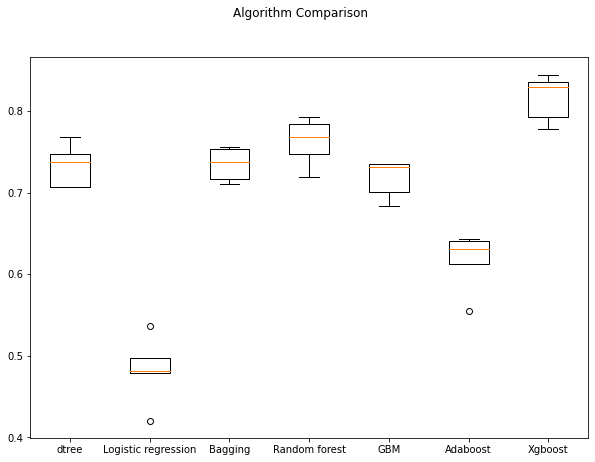

<IPython.core.display.Javascript object>

In [65]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- We can see that Xgboost is giving the highest cross-validated recall followed by Random forest and Bagging classifier.
- In validation xgboost is giving also highest recall score followed by Random forest and Bagging classifier.
- The Performance of XGBoost and Random forest is highest on cross-validation. 

**Now, Lets check model performance with oversampled data**

### Model Building with Oversampled data


In [66]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 1640
Before OverSampling, counts of label '0': 28360 

After OverSampling, counts of label '1': 28360
After OverSampling, counts of label '0': 28360 

After OverSampling, the shape of train_X: (56720, 40)
After OverSampling, the shape of train_y: (56720,) 



<IPython.core.display.Javascript object>

In [67]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost on oversample data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance on Oversampled data:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost on oversample data:

dtree: 0.9722143864598026
Logistic regression: 0.8754583921015515
Bagging: 0.9730606488011284
Random forest: 0.9817348377997179
GBM: 0.9148095909732017
Adaboost: 0.8933004231311706
Xgboost: 0.9843794076163611

Validation Performance on Oversampled data:

dtree: 0.8135283363802559
Logistic regression: 0.8391224862888482
Bagging: 0.8354661791590493
Random forest: 0.8683729433272395
GBM: 0.8811700182815356
Adaboost: 0.850091407678245
Xgboost: 0.8793418647166362


<IPython.core.display.Javascript object>

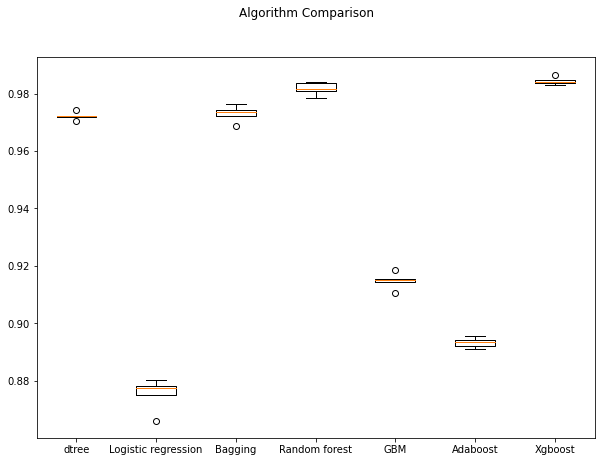

<IPython.core.display.Javascript object>

In [68]:
# Creating boxplot to check model performance on over sampled data

fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- In oversampled data, Xgboost is giving the highest cross-validated recall followed by Random forest and Bagging classifier.
- But, In validation gbm is giving highest recall score followed by Random forest and xgboost classifier.

**Lets analyze further on the undersampled data and see which model performs better**

### Model Building with Undersampled data

In [69]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 1640
Before UnderSampling, counts of label '0': 28360 

After UnderSampling, counts of label '1': 1640
After UnderSampling, counts of label '0': 1640 

After UnderSampling, the shape of train_X: (3280, 40)
After UnderSampling, the shape of train_y: (3280,) 



<IPython.core.display.Javascript object>

In [70]:
# we have added all of our models in  models list
models

[('dtree', DecisionTreeClassifier(random_state=1)),
 ('Logistic regression', LogisticRegression(random_state=1)),
 ('Bagging', BaggingClassifier(random_state=1)),
 ('Random forest', RandomForestClassifier(random_state=1)),
 ('GBM', GradientBoostingClassifier(random_state=1)),
 ('Adaboost', AdaBoostClassifier(random_state=1)),
 ('Xgboost',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=1, predictor='auto', random_state=1,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters

<IPython.core.display.Javascript object>

In [71]:
# Lets build our Model with undersampled data
results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost on undersample data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance on undersampled data:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost on undersample data:

dtree: 0.8591463414634146
Logistic regression: 0.8554878048780488
Bagging: 0.875
Random forest: 0.8981707317073171
GBM: 0.8871951219512194
Adaboost: 0.8725609756097562
Xgboost: 0.8939024390243903

Validation Performance on undersampled data:

dtree: 0.8537477148080439
Logistic regression: 0.8464351005484461
Bagging: 0.8628884826325411
Random forest: 0.8848263254113345
GBM: 0.8884826325411335
Adaboost: 0.8647166361974405
Xgboost: 0.9012797074954296


<IPython.core.display.Javascript object>

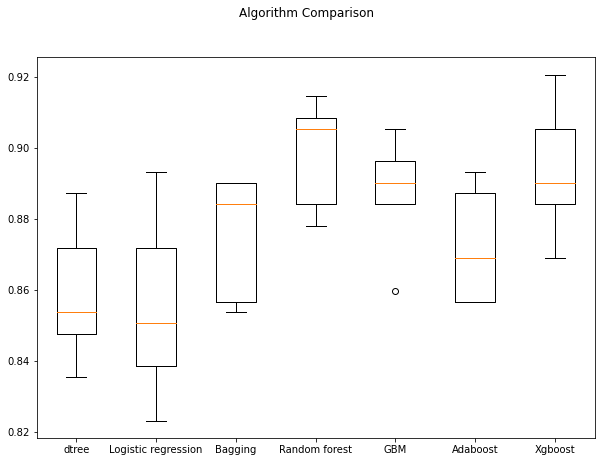

<IPython.core.display.Javascript object>

In [72]:
# creating boxplot to check model performance on under sampled data

fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- In undersampled data, Xgboost is giving the highest cross-validated recall followed by Random forest and gradient boosting.
- But, In validation also xgboost is giving highest recall score followed by Random forest and gbm classifier.

**Observation:**
* we have built our model with original data, oversampled data and undersampled data.
* we have observed that xgboost, random forest and gbm classier are poviding models with highest recall score.
* Now, we will try to improve performance of the model by using hyperparameter tuning.
* We will tune - XGBoost,random forest and gbm and see if the performance improves. 

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - suggested parameters are:(wherever required)**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Tuning Random forest using oversampled data

In [73]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9780324400564175:
Wall time: 2h 14min 38s


<IPython.core.display.Javascript object>

In [74]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.6,
    n_estimators=250,
    min_samples_leaf=1,
)
## Code to fit the model on over sampled data
tuned_rf2.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

<IPython.core.display.Javascript object>

In [75]:
# Code to check the performance on oversampled train set
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_over, y_train_over
)
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


<IPython.core.display.Javascript object>

In [76]:
# Code to check the performance on validation set
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.990,0.872,0.948,0.909


<IPython.core.display.Javascript object>

### Tuning Gradient Boosting using oversampled data

In [77]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.9584273624823695:
Wall time: 13min 9s


<IPython.core.display.Javascript object>

In [78]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    learning_rate=1,
)

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=125,
                           random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [79]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.979,0.975,0.983,0.979


<IPython.core.display.Javascript object>

In [80]:
gbm_val_perf = model_performance_classification_sklearn(
    tuned_gbm, X_val, y_val
)  ## Complete the code to check the performance on validation set
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.964,0.861,0.624,0.724


<IPython.core.display.Javascript object>

### Tuning XGBoost using oversampled data

In [81]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9959802538787024:
Wall time: 1h 45min 28s


<IPython.core.display.Javascript object>

In [82]:
# Creating new pipeline with best parameters
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5,
)
## Complete the code to fit the model on over sampled data
xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [83]:
## Complete the code to check the performance on oversampled train set
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.994,1.000,0.988,0.994


<IPython.core.display.Javascript object>

In [84]:
## Complete the code to check the performance on validation set
xgb2_val_perf = model_performance_classification_sklearn(xgb2, X_val, y_val)
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.974,0.905,0.702,0.791


<IPython.core.display.Javascript object>

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

### Model Performance comparison on oversampled data

In [85]:
models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        xgb2_train_perf.T,
        rf2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "Random forest tuned with oversampled data",
]
print("Training performance comparison in oversampled data:")
models_train_comp_df

Training performance comparison in oversampled data:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,Random forest tuned with oversampled data
Accuracy,0.979,0.994,1.000
Recall,0.975,1.000,0.999
Precision,0.983,0.988,1.000
F1,0.979,0.994,1.000


<IPython.core.display.Javascript object>

**Observation:**
* All of the three models performing extremely well on training dataset.

In [86]:
models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        xgb2_val_perf.T,
        rf2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "Random forest tuned with oversampled data",
]
print("Validation performance comparison on oversampled data:")
models_val_comp_df

Validation performance comparison on oversampled data:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,Random forest tuned with oversampled data
Accuracy,0.964,0.974,0.990
Recall,0.861,0.905,0.872
Precision,0.624,0.702,0.948
F1,0.724,0.791,0.909


<IPython.core.display.Javascript object>

**Observations:**
* Xgboost tuned with oversample data is giving generalized model on both training and validation data followed by random forest.
* Now lets see which model performs best using undersampled data.

## Tuning Models using unsersampled data

### Tuning Random forest using undersampled data

In [87]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.899390243902439:
Wall time: 53.9 s


<IPython.core.display.Javascript object>

In [88]:
# Creating new pipeline with best parameters
tuned_rf2_un = RandomForestClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.4,
    n_estimators=200,
    min_samples_leaf=2,
)
## Code to fit the model on under sampled data
tuned_rf2_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features='sqrt', max_samples=0.4, min_samples_leaf=2,
                       n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [89]:
## Code to check the performance on undersampled train set
rf2_un_train_perf = model_performance_classification_sklearn(
    tuned_rf2_un, X_train_un, y_train_un
)
rf2_un_train_perf

,Accuracy,Recall,Precision,F1
0,0.955,0.921,0.988,0.954


<IPython.core.display.Javascript object>

In [90]:
## Code to check the performance on validation set
rf2_un_val_perf = model_performance_classification_sklearn(tuned_rf2_un, X_val, y_val)
rf2_un_val_perf

,Accuracy,Recall,Precision,F1
0,0.960,0.890,0.590,0.710


<IPython.core.display.Javascript object>

### Tuning xgboost using undersampled data

In [91]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9195121951219513:
Wall time: 5min 53s


<IPython.core.display.Javascript object>

In [92]:
# Creating new pipeline with best parameters
xgb2_un = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=150,
    learning_rate=0.1,
    gamma=5,
)
## Code to fit the model on under sampled data
xgb2_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [93]:
## Code to check the performance on undersampled train set
xgb2_un_train_perf = model_performance_classification_sklearn(
    xgb2_un, X_train_un, y_train_un
)
xgb2_un_train_perf

,Accuracy,Recall,Precision,F1
0,0.995,1.000,0.990,0.995


<IPython.core.display.Javascript object>

In [94]:
## Code to check the performance on validation set
xgb2_un_val_perf = model_performance_classification_sklearn(xgb2_un, X_val, y_val)
xgb2_un_val_perf

,Accuracy,Recall,Precision,F1
0,0.900,0.918,0.344,0.500


<IPython.core.display.Javascript object>

### Tuning Gradient Boosting using undersampled data

In [95]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.9030487804878048:
Wall time: 38.3 s


<IPython.core.display.Javascript object>

In [96]:
# Creating new pipeline with best parameters
tuned_gbm_un = GradientBoostingClassifier(
    max_features=0.5, random_state=1, subsample=0.5, n_estimators=125, learning_rate=0.2
)

tuned_gbm_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.5)

<IPython.core.display.Javascript object>

In [97]:
gbm_un_train_perf = model_performance_classification_sklearn(
    tuned_gbm_un, X_train_un, y_train_un
)
gbm_un_train_perf

,Accuracy,Recall,Precision,F1
0,0.977,0.960,0.994,0.977


<IPython.core.display.Javascript object>

In [98]:
gbm_un_val_perf = model_performance_classification_sklearn(
    tuned_gbm_un, X_val, y_val
)  ## Complete the code to check the performance on validation set
gbm_un_val_perf

,Accuracy,Recall,Precision,F1
0,0.935,0.899,0.453,0.603


<IPython.core.display.Javascript object>

### Model Performance comparison on undersampled data

In [99]:
models_un_train_comp_df = pd.concat(
    [
        gbm_un_train_perf.T,
        xgb2_un_train_perf.T,
        rf2_un_train_perf.T,
    ],
    axis=1,
)
models_un_train_comp_df.columns = [
    "Gradient Boosting tuned with undersampled data",
    "XGBoost tuned with undersampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison in undersampled data:")
models_un_train_comp_df

Training performance comparison in undersampled data:


,Gradient Boosting tuned with undersampled data,XGBoost tuned with undersampled data,Random forest tuned with undersampled data
Accuracy,0.977,0.995,0.955
Recall,0.960,1.000,0.921
Precision,0.994,0.990,0.988
F1,0.977,0.995,0.954


<IPython.core.display.Javascript object>

* All of the three models are performing well on train unsersampled data.

In [100]:
# validation performance using undersampled data
models_un_val_comp_df = pd.concat(
    [
        gbm_un_val_perf.T,
        xgb2_un_val_perf.T,
        rf2_un_val_perf.T,
    ],
    axis=1,
)
models_un_val_comp_df.columns = [
    "Gradient Boosting tuned with undersampled data",
    "XGBoost tuned with undersampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison in undersampled:")
models_un_val_comp_df

Validation performance comparison in undersampled:


,Gradient Boosting tuned with undersampled data,XGBoost tuned with undersampled data,Random forest tuned with undersampled data
Accuracy,0.935,0.900,0.960
Recall,0.899,0.918,0.890
Precision,0.453,0.344,0.590
F1,0.603,0.500,0.710


<IPython.core.display.Javascript object>

* XGBoost tuned with undersampled data is giving highest recall score.

## Model Performance comparison between oversampled and undersampled and Choosing the final model

### Training performance comparision between oversampled and undersampled data

In [101]:
print("Training performance comparison in oversampled data:")
models_train_comp_df



Training performance comparison in oversampled data:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,Random forest tuned with oversampled data
Accuracy,0.979,0.994,1.000
Recall,0.975,1.000,0.999
Precision,0.983,0.988,1.000
F1,0.979,0.994,1.000


<IPython.core.display.Javascript object>

In [102]:
print("Training performance comparison in undersampled data:")
models_un_train_comp_df

Training performance comparison in undersampled data:


,Gradient Boosting tuned with undersampled data,XGBoost tuned with undersampled data,Random forest tuned with undersampled data
Accuracy,0.977,0.995,0.955
Recall,0.960,1.000,0.921
Precision,0.994,0.990,0.988
F1,0.977,0.995,0.954


<IPython.core.display.Javascript object>

**Observations:**
* All three models performing extremely well on train data.
* Lets observe the performance on validation data.

### Validation performance comparision between oversampled and undersampled data

In [103]:
print("Validation performance comparison on oversampled data:")
models_val_comp_df

Validation performance comparison on oversampled data:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,Random forest tuned with oversampled data
Accuracy,0.964,0.974,0.990
Recall,0.861,0.905,0.872
Precision,0.624,0.702,0.948
F1,0.724,0.791,0.909


<IPython.core.display.Javascript object>

In [104]:
print("Validation performance comparison in undersampled:")
models_un_val_comp_df

Validation performance comparison in undersampled:


,Gradient Boosting tuned with undersampled data,XGBoost tuned with undersampled data,Random forest tuned with undersampled data
Accuracy,0.935,0.900,0.960
Recall,0.899,0.918,0.890
Precision,0.453,0.344,0.590
F1,0.603,0.500,0.710


<IPython.core.display.Javascript object>

**Observations:**
* Xgboost with undersampled data is giving highest recall score on validation data.But, its precision and F1 score is much less than xgboost with oversampled data.
* On ther other hand, XGBoost tuned with oversampled data is giving more generalized model performance in terms of accuracy,recall, precision and F1 score.
* so our final models is XGBoost tuned with oversampled data.

**Now, XGBoost tuned with oversampled data is our final model, so let's find out how our model is performing on unseen test data.**

In [105]:
# Calculating different metrics on the test set for the model XGBoost with oversampled data
xgb2_test_perf = model_performance_classification_sklearn(xgb2, X_test, y_test)
print("Test performance on tuned xgboost with oversampled data:")
xgb2_test_perf

Test performance on tuned xgboost with oversampled data:


,Accuracy,Recall,Precision,F1
0,0.971,0.885,0.683,0.771


<IPython.core.display.Javascript object>

**Observation:**
* XGboost with oversampled data model is performing more generalised on test data set.

**XGboost tuned with oversampled data model is performing more generalised on both validation and test data set.**

### Feature Importances

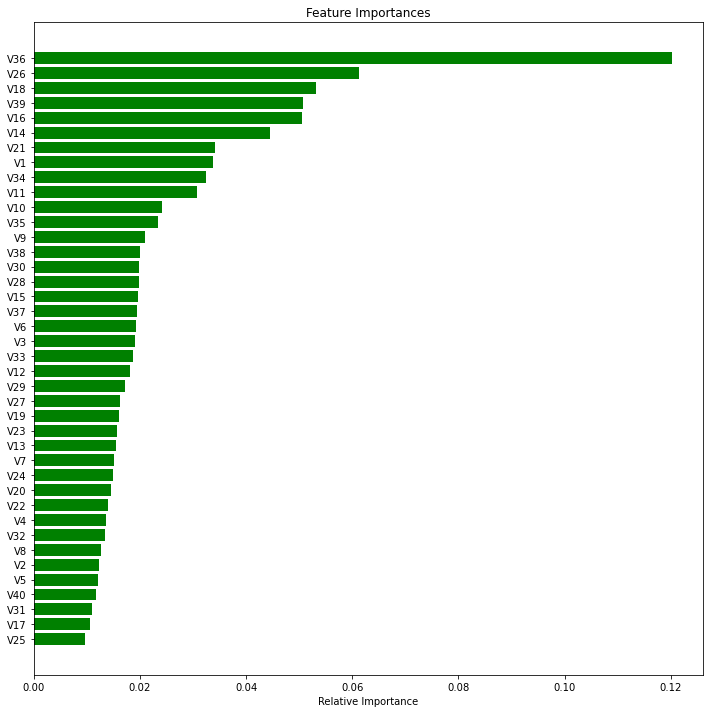

<IPython.core.display.Javascript object>

In [106]:
feature_names = X_train.columns
# checking the feature importance of the best model which is XGBoost tuned with oversampled data
importances = xgb2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* V36 is the most important feature, followed by V26 and V18. 

## Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [107]:
## Creating pipeline for the best model
# Creating new pipeline with best parameters
Model = Pipeline(
    steps=[
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=250,
                scale_pos_weight=10,
                subsample=0.9,
                learning_rate=0.1,
                gamma=5,
                eval_metric="logloss",
            ),
        ),
    ]
)

<IPython.core.display.Javascript object>

In [108]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

# Droping target variable from test data
X_test1 = df_test.drop(columns="Target")
# storing target variable in y_test1
y_test1 = df_test["Target"] 


<IPython.core.display.Javascript object>

In [109]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# let's treat the missing values in the test set
X2 = imputer.fit_transform(
    X_test1
)  ##  Complete the code to treat the missing values in the test set

<IPython.core.display.Javascript object>

In [110]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

In [111]:
#  Code to fit the Model obtained from above step
Model.fit(
    X_over1, y_over1
) 

Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=5, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=10, subsample=0.9,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

<IPython.core.display.Javascript object>

In [112]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(Model, X2, y_test1)
Model_test

,Accuracy,Recall,Precision,F1
0,0.965,0.887,0.623,0.732


<IPython.core.display.Javascript object>

* Final classification model is able to  identify failures with `~97% accuracy` and `88.7% recall score` so that the generator could be repaired before failing/breaking to reduce the maintenance cost.

# Business Insights and Conclusions

* Using classification model, U.S Department of Energy will be able to achieve operational efficiency using predictive maintenance practice with ~97% accuracy and 88.7% recall score.

* Failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

* Classification models will identify failures with 88.7% recall score so that the generator could be repaired before failing/breaking to reduce the maintenance cost.

* Model suggests that most important feature is V36, followed by V26 and V18. so Department of Energy must inspect these sensor data related devices in regular interval basis so that it can identify faulty components and can replace it.

* since V36 is the most important features for generator failure so this sensor data related device should inspect by weekly or by half month basis which in turn will save huge replacement cost of the device.

* Basing on our final classification model,  the sensor data related device should be inspected as following interval to reduce operation cost:
    * `V36` related device in `weekly/bi weekly` basing on alloted budget.
    * `V26 and v18` related devices in `monthly` basis.
    * `V39,V16,V14` related device in two `months/quarterly`.
    * `V21,V1,V34,V11,V10,V35` in `half yearly` basis.
    * `V9,V38,V30,V28,V15,V37,V6,V3` on `yearly` basis.
    * rest of the features related device can be checked in three year basis.
*  since, inspection cost($5000) and repair cost($15000) is equal to $20000 which is half of the replacement cost($40,000).so, regular planned inspection can save huge mone regarding device failure.
* Idenfitying problem correctly not only save money but also other resources like time, equipment and save a lot of hard work.
* So,U.S Department of Energy should plan the regualr inspection and maintenace meticulously basing on the above suggested timeframe. Department can adjust the timeframe since it requires cost for inspection($5000) which is also subjected to budget allocation for the purpose.

***